In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.colors as colors
from scripts.conversion import *
import pandas as pd
from sklearn.metrics import average_precision_score, precision_recall_curve
import energyflow as ef


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
distortions = ['shifted', 'smeared', 'tailcut', 'truth']

In [3]:
cd ..

/home/rd804/discriminator-metric


In [10]:
# load data for distorted distributions

s = 'valid'
# load data for distorted distributions
data_dict = {}
for test in distortions:
    score_trial = []
    for trial in range(1,6,1):
        exp_name = f'trial_{trial}_pn_lite_{test}'
        save_dir = f'output/{exp_name}'

        val_loss = np.load(f'{save_dir}/loss_val.npy')
        # lowest 10 val losses
        best_epochs = np.argsort(val_loss)[:5]

        for epoch in best_epochs:
            score_trial.append(np.load(f'{save_dir}/score_val_{epoch}.npy')[:,0])

    score_trial = np.array(score_trial).transpose()
    score = np.mean(score_trial, axis=1)
    print(score_trial.shape) 
    print(score.shape) 
 

    label = pd.read_hdf('data/jetnet30_data.h5', f'labels__{test}_{s}')['labels'].values
    jets = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{test}_{s}').values.reshape(-1,30,4)

    mass = mjj_jets(jets)

    data_dict[test] = {'score': score, 'label': label, 'mass': mass, 'jets': jets}




(100000, 25)
(100000,)
(100000, 25)
(100000,)
(100000, 25)
(100000,)
(100000, 25)
(100000,)


# Tailcut

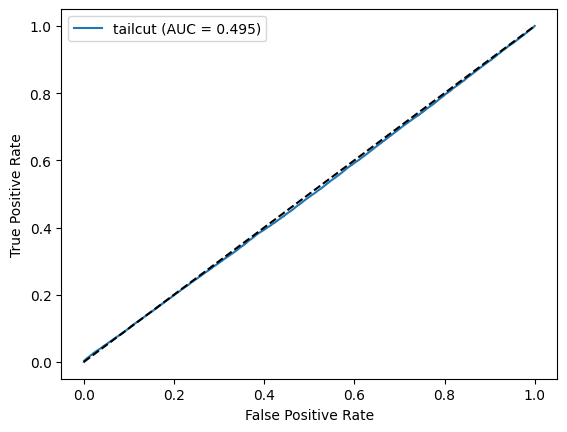

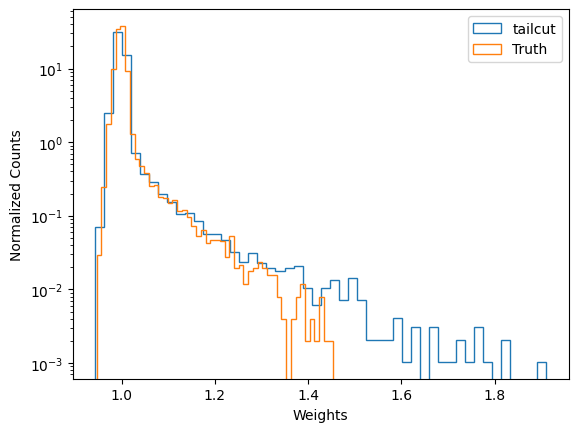

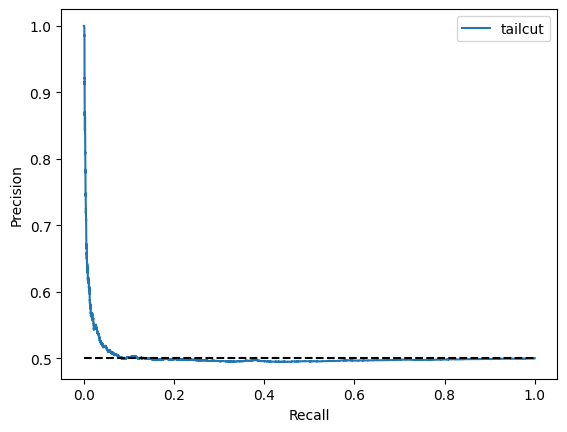

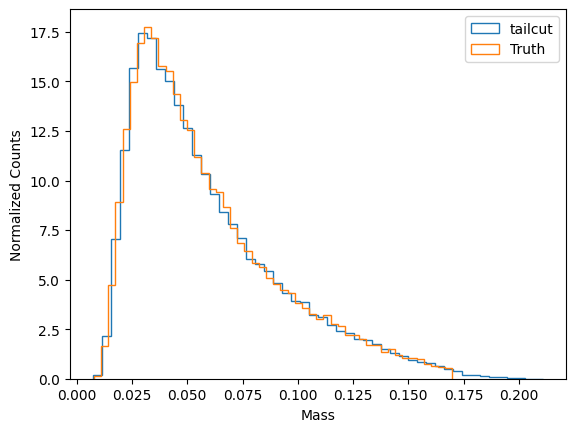

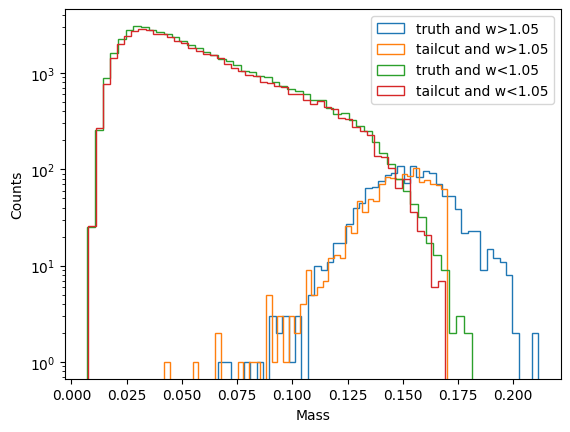

In [36]:
distortion = 'tailcut'
# load data for distorted distributions

score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

# compute auc of score
auc = roc_auc_score(label, score)

# plot roc curve
fpr, tpr, _ = roc_curve(label, score)
plt.plot(fpr, tpr, label=f'{distortion} (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# show weight histogram
weight = score/(1-score)

plt.hist(weight[label==1], bins=50, histtype='step', label=distortion
         , density=True)
plt.hist(weight[label==0], bins=50, histtype='step', label='Truth',
         density=True)
plt.xlabel('Weights')
plt.ylabel('Normalized Counts')
plt.legend()
plt.yscale('log')
plt.show()

# plot precision recall curve
precision, recall, _ = precision_recall_curve(label, score)
plt.plot(recall, precision, label=f'{distortion}')
plt.plot([0,1], [np.sum(label)/len(label), np.sum(label)/len(label)], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# plot mass distribution
plt.hist(mass[label==1], bins=50, histtype='step', label=distortion, density=True)
plt.hist(mass[label==0], bins=50, histtype='step', label='Truth', density=True)
plt.xlabel('Mass')
plt.ylabel('Normalized Counts')
plt.legend()
plt.show()

# plot mass distribution with cut on weight at 1.1 for different labels
plt.hist(mass[(label==1) & (weight>1.05)], bins=50, histtype='step', 
         label='truth and w>1.05', 
         density=False)
plt.hist(mass[(label==0) & (weight>1.05)], bins=50, histtype='step', 
         label=f'{distortion} and w>1.05', 
         density=False)
plt.hist(mass[(label==1) & (weight<1.05)], bins=50, histtype='step', 
         label='truth and w<1.05', 
         density=False)
plt.hist(mass[(label==0) & (weight<1.05)], bins=50, histtype='step', 
         label=f'{distortion} and w<1.05', 
         density=False)

plt.xlabel('Mass')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.show()



# Smeared

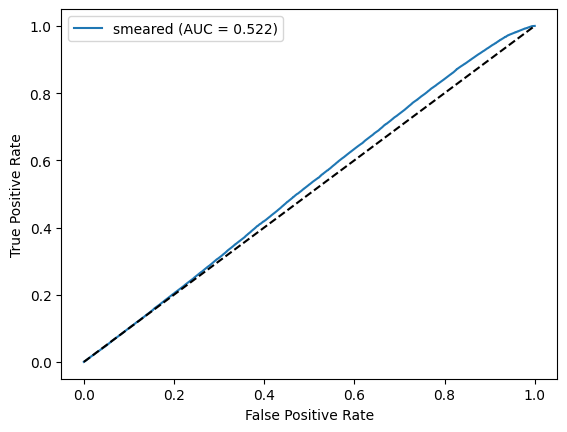

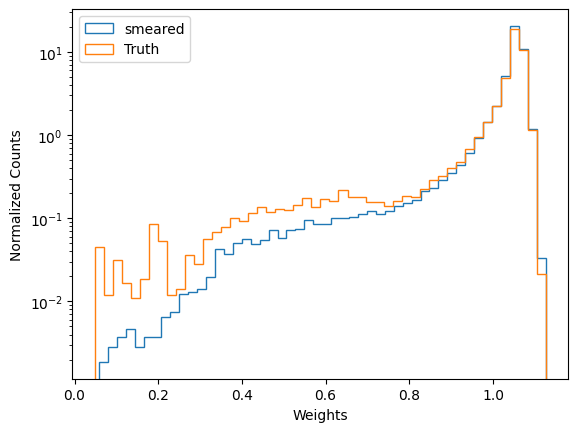

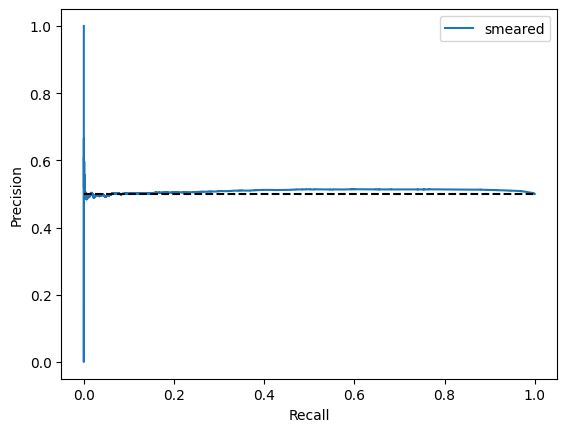

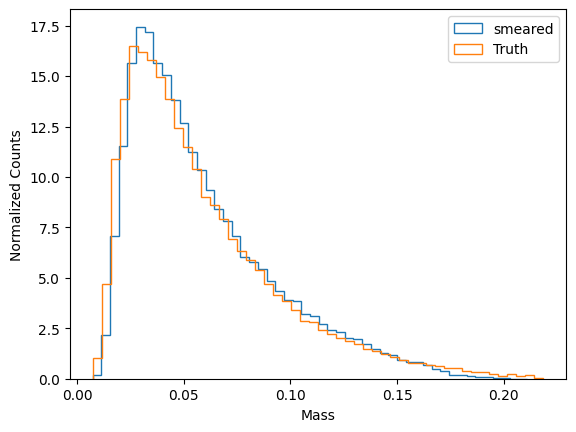

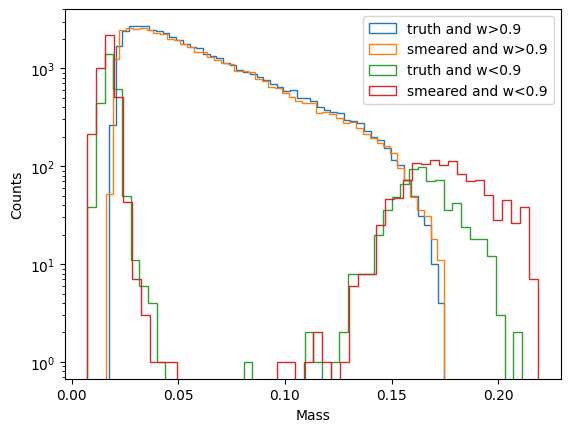

In [39]:
distortion = 'smeared'
# load data for distorted distributions

cut = 0.9

score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

# compute auc of score
auc = roc_auc_score(label, score)

# plot roc curve
fpr, tpr, _ = roc_curve(label, score)
plt.plot(fpr, tpr, label=f'{distortion} (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# show weight histogram
weight = score/(1-score)

plt.hist(weight[label==1], bins=50, histtype='step', label=distortion
         , density=True)
plt.hist(weight[label==0], bins=50, histtype='step', label='Truth',
         density=True)
plt.xlabel('Weights')
plt.ylabel('Normalized Counts')
plt.legend(loc = 'upper left')
plt.yscale('log')
plt.show()

# plot precision recall curve
precision, recall, _ = precision_recall_curve(label, score)
plt.plot(recall, precision, label=f'{distortion}')
plt.plot([0,1], [np.sum(label)/len(label), np.sum(label)/len(label)], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# plot mass distribution
plt.hist(mass[label==1], bins=50, histtype='step', label=distortion, density=True)
plt.hist(mass[label==0], bins=50, histtype='step', label='Truth', density=True)
plt.xlabel('Mass')
plt.ylabel('Normalized Counts')
plt.legend()
plt.show()

# plot mass distribution with cut on weight at 1.1 for different labels
plt.hist(mass[(label==1) & (weight>cut)], bins=50, histtype='step', 
         label=f'truth and w>{cut}', 
         density=False)
plt.hist(mass[(label==0) & (weight>cut)], bins=50, histtype='step', 
         label=f'{distortion} and w>{cut}', 
         density=False)
plt.hist(mass[(label==1) & (weight<cut)], bins=50, histtype='step', 
         label=f'truth and w<{cut}', 
         density=False)
plt.hist(mass[(label==0) & (weight<cut)], bins=50, histtype='step', 
         label=f'{distortion} and w<{cut}', 
         density=False)

plt.xlabel('Mass')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.show()



# Shifted

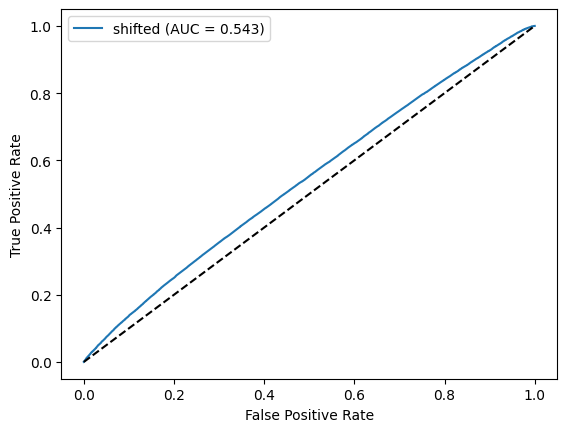

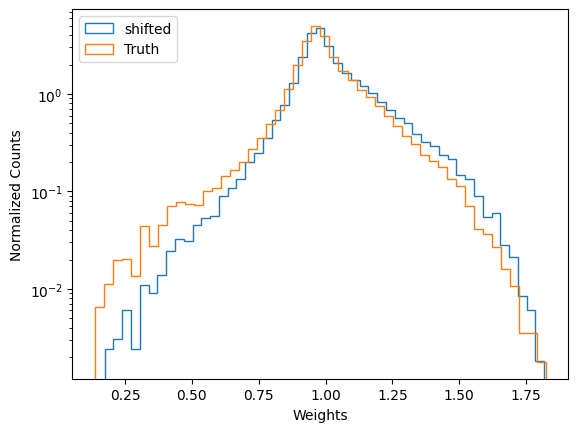

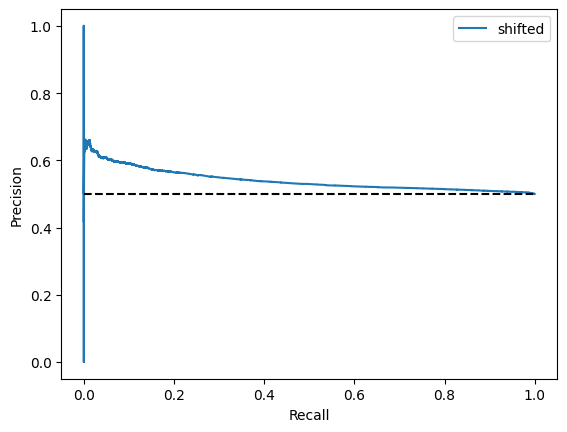

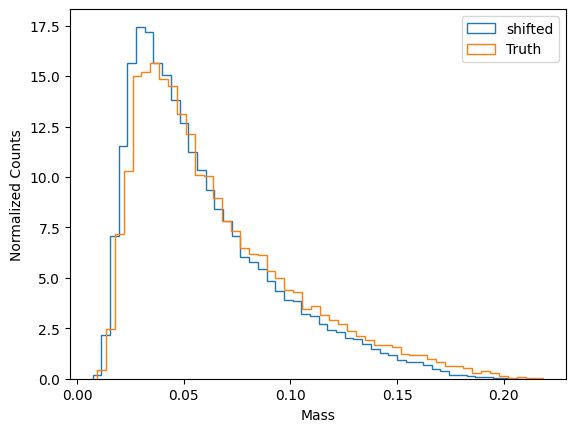

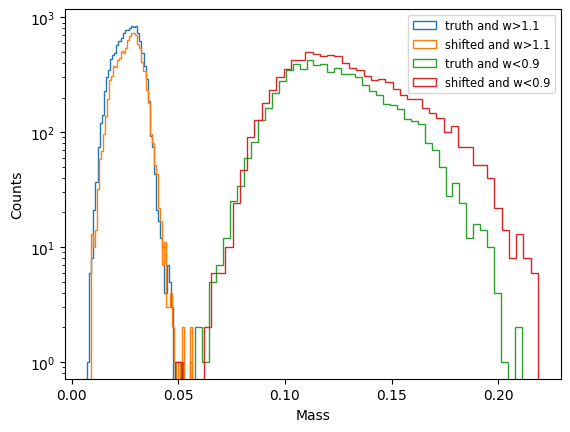

In [58]:
distortion = 'shifted'
# load data for distorted distributions

cut_1 = 0.9
cut_2 = 1.1

score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

# compute auc of score
auc = roc_auc_score(label, score)

# plot roc curve
fpr, tpr, _ = roc_curve(label, score)
plt.plot(fpr, tpr, label=f'{distortion} (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# show weight histogram
weight = score/(1-score)

plt.hist(weight[label==1], bins=50, histtype='step', label=distortion
         , density=True)
plt.hist(weight[label==0], bins=50, histtype='step', label='Truth',
         density=True)
plt.xlabel('Weights')
plt.ylabel('Normalized Counts')
plt.legend(loc = 'upper left')
plt.yscale('log')
plt.show()

# plot precision recall curve
precision, recall, _ = precision_recall_curve(label, score)
plt.plot(recall, precision, label=f'{distortion}')
plt.plot([0,1], [np.sum(label)/len(label), np.sum(label)/len(label)], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# plot mass distribution
plt.hist(mass[label==1], bins=50, histtype='step', label=distortion, density=True)
plt.hist(mass[label==0], bins=50, histtype='step', label='Truth', density=True)
plt.xlabel('Mass')
plt.ylabel('Normalized Counts')
plt.legend()
plt.show()

# plot mass distribution with cut on weight at 1.1 for different labels
plt.hist(mass[(label==1) & (weight>cut_2)], bins=50, histtype='step', 
         label=f'truth and w>{cut_2}', 
         density=False)
plt.hist(mass[(label==0) & (weight>cut_2)], bins=50, histtype='step', 
         label=f'{distortion} and w>{cut_2}', 
         density=False)
plt.hist(mass[(label==1) & (weight<cut_1)], bins=50, histtype='step', 
         label=f'truth and w<{cut_1}', 
         density=False)
plt.hist(mass[(label==0) & (weight<cut_1)], bins=50, histtype='step', 
         label=f'{distortion} and w<{cut_1}', 
         density=False)

plt.xlabel('Mass')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend(loc='upper right', fontsize=8.3)
plt.show()



# Truth

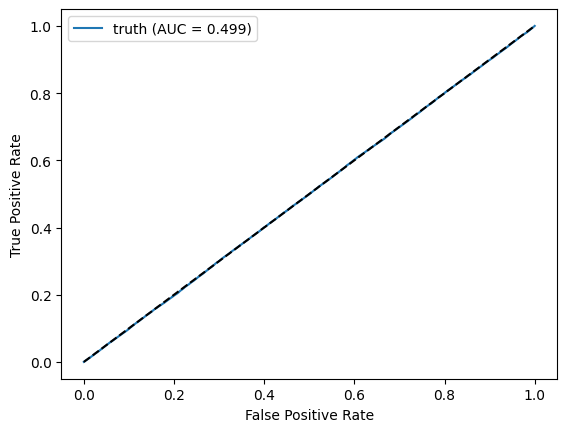

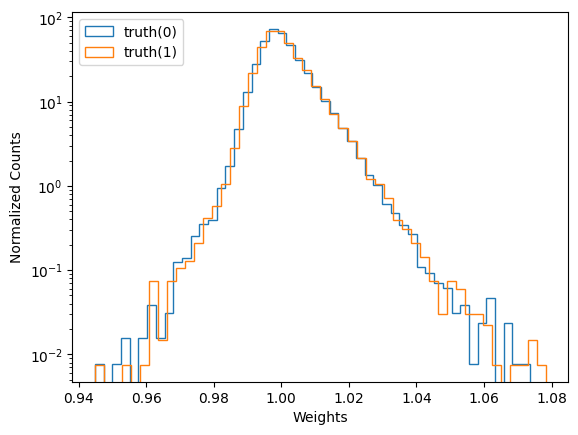

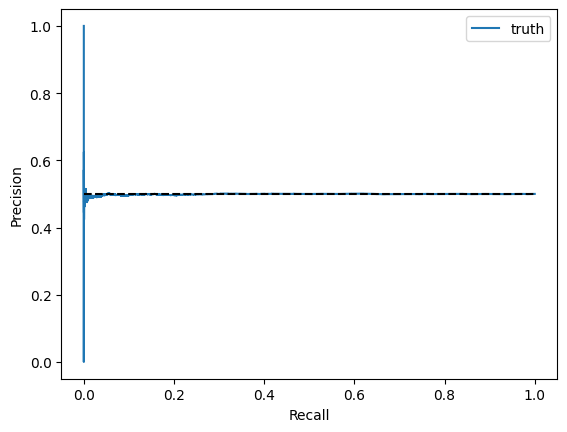

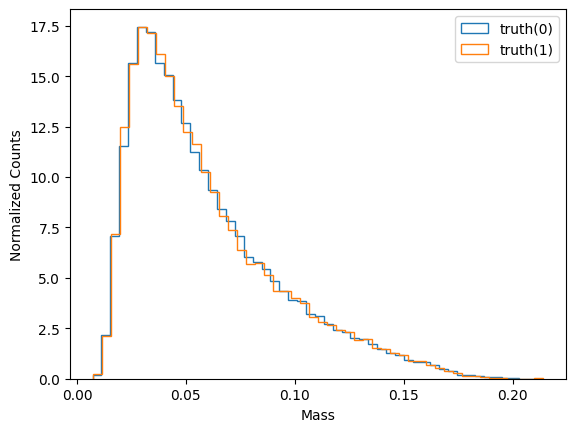

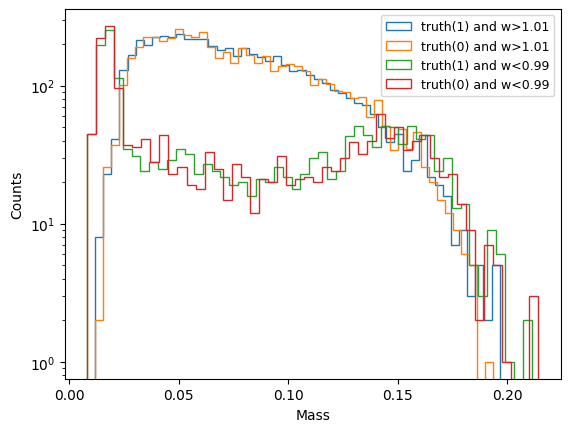

In [61]:
distortion = 'truth'
# load data for distorted distributions

cut_1 = 0.99
cut_2 = 1.01

score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

# compute auc of score
auc = roc_auc_score(label, score)

# plot roc curve
fpr, tpr, _ = roc_curve(label, score)
plt.plot(fpr, tpr, label=f'{distortion} (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# show weight histogram
weight = score/(1-score)

plt.hist(weight[label==1], bins=50, histtype='step', label=f'{distortion}(0)'
         , density=True)
plt.hist(weight[label==0], bins=50, histtype='step', label='truth(1)',
         density=True)
plt.xlabel('Weights')
plt.ylabel('Normalized Counts')
plt.legend(loc = 'upper left')
plt.yscale('log')
plt.show()

# plot precision recall curve
precision, recall, _ = precision_recall_curve(label, score)
plt.plot(recall, precision, label=f'{distortion}')
plt.plot([0,1], [np.sum(label)/len(label), np.sum(label)/len(label)], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# plot mass distribution
plt.hist(mass[label==1], bins=50, histtype='step', label=f'{distortion}(0)', density=True)
plt.hist(mass[label==0], bins=50, histtype='step', label='truth(1)', density=True)
plt.xlabel('Mass')
plt.ylabel('Normalized Counts')
plt.legend()
plt.show()

# plot mass distribution with cut on weight at 1.1 for different labels
plt.hist(mass[(label==1) & (weight>cut_2)], bins=50, histtype='step', 
         label=f'truth(1) and w>{cut_2}', 
         density=False)
plt.hist(mass[(label==0) & (weight>cut_2)], bins=50, histtype='step', 
         label=f'{distortion}(0) and w>{cut_2}', 
         density=False)
plt.hist(mass[(label==1) & (weight<cut_1)], bins=50, histtype='step', 
         label=f'truth(1) and w<{cut_1}', 
         density=False)
plt.hist(mass[(label==0) & (weight<cut_1)], bins=50, histtype='step', 
         label=f'{distortion}(0) and w<{cut_1}', 
         density=False)

plt.xlabel('Mass')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend(loc='upper right', fontsize=9)
plt.show()

